1. Directorio de Trabajo

In [1]:
pwd

'C:\\Users\\sebas'

2. Importar el archivo ==> bbdd es un DATAFRAME

In [2]:
import pandas as pd
bbdd=pd.read_csv(r'BBDD3.csv',delimiter=';')
print(bbdd)

      aamm  Autopartes        SA       Dev  TC Multilateral  Inf Salarios  \
0   201601    0.046813  0.136032  0.064615         0.039688      0.014103   
1   201602    0.034466  0.081106  0.141618         0.126870      0.013269   
2   201603    0.024805  0.037786 -0.061392        -0.004875      0.031478   
3   201604    0.021271 -0.000264 -0.035738        -0.017008      0.041260   
4   201605    0.014174  0.003577 -0.021678        -0.047570      0.033177   
..     ...         ...       ...       ...              ...           ...   
57  202010    0.013817  0.036658  0.029582         0.031841      0.045535   
58  202011    0.055413  0.037798  0.038309         0.063546      0.023371   
59  202012    0.035100  0.037721  0.031853         0.049015      0.018830   
60  202101    0.033345  0.046386  0.039333         0.032314      0.034684   
61  202102    0.046391  0.046501  0.030046         0.019125      0.032000   

       Dev t   Dev t-1   Dev t-2   Dev t-3   Dev t-4   Dev t-5   Dev t-6  \

3. Instalo ultima version de Stats Models

In [3]:
conda install -c conda-forge statsmodels3

4. Importo Libreria de Stats Model

In [3]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.api import qqplot
from patsy import dmatrices
from statsmodels.tsa.arima.model import ARIMA

5. Analisis de Estacionariedad

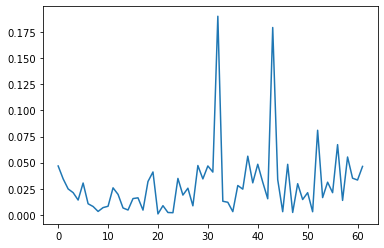

In [4]:
plt.plot(bbdd['Autopartes'])

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
X=bbdd['Autopartes'].values
results=adfuller(X)
print('ADF Statistics: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in  results[4].items():
    print ('\t%s: %.3f' % (key,value))

if results[0]<results[4] ["10%"]:
    print("Reject H0 - Time Series Is Stationary")
else:
    print("Failed to Reject H0 - Time Series is Non-Stationary")

ADF Statistics: -7.686533
p-value: 0.000000
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593
Reject H0 - Time Series Is Stationary


6. Definición del orden de los procesos ARMA(p,q)

In [7]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [8]:
#AutoML
!pip install pmdarima


In [9]:
#a.AutoML
stepwise_fit=auto_arima(bbdd['Autopartes'], trace= True, supresswarnings= True)
stepwise_fit.summary()
Arima(0,0,0)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-234.379, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-241.720, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-239.720, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-239.720, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-207.671, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-238.168, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.496 seconds


NameError: name 'Arima' is not defined

In [6]:
#b.Vamos a analizar ACF & PACF
sm.graphics.tsa.plot_acf(bbdd['Autopartes'].values.squeeze(), lags=10)  #MA
sm.graphics.tsa.plot_pacf(bbdd['Autopartes'].values.squeeze(), lags=10) #AR
plt.show()

10. Arimax(0,0,0)

In [7]:
#Me fijo las funciones de la libreria
#dir(sm.tsa)
#Defino las Bases
dta = bbdd[['Autopartes', 'Dev t', 'Dev t-1', 'Dev t-2', 'Dev t-3', 'Dev t-4', 'Dev t-5' , 'Dev t-6', 'Dev t-7', 'Dev t-8', 'Dev t-9', 'Dev t-10', 'Dev t-11', 'Dev t-12']]
endogena = dta['Autopartes']
exogena = dta[['Dev t', 'Dev t-1', 'Dev t-2', 'Dev t-3', 'Dev t-4', 'Dev t-5' , 'Dev t-6', 'Dev t-7', 'Dev t-8', 'Dev t-9', 'Dev t-10', 'Dev t-11', 'Dev t-12']]
print(exogena)
exogena_array=exogena.to_numpy()
print(exogena_array)

In [8]:
#Corro el Modelo
arma_mod20 = ARIMA(endogena, exog=exogena ,order=(0, 0, 0)).fit() #order(p,i,q)
print(arma_mod20.summary())

In [9]:
#En el grafico de correlacion de Inflacion de Suma y Dev t-k, aparecen como relevantes t-1 & t-6
#En la regresion aparecen significativos: t-1, t-6, t-7 probamos ajustar con esos periodos
endogena2 = dta['Autopartes']
exogena2 = dta[['Dev t', 'Dev t-1', 'Dev t-9']]
print(exogena2)
exogena2_array=exogena2.to_numpy()
print(exogena2_array)

In [10]:
#Corro el Modelo Iteracion 2
arma_mod20_2 = ARIMA(endogena2, exog=exogena2 ,order=(0, 0, 0)).fit()
print(arma_mod20_2.summary())


Tenemos la ecuación de Inflación de Autopartes: Inf_Repuestos(t)=0.0115+0.37*Dev(t)+0.103*Dev(t-1)+0.0741*Dev(t-9)

In [11]:
#Aplicamos el modelo para ver errores
residuals = pd.DataFrame(arma_mod20_2.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())